In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

from datasets import load_dataset

In [2]:
dataset = load_dataset("alexjercan/aoc")

df = pd.DataFrame(dataset["train"])

df.head()

Found cached dataset aoc (/home/alex/.cache/huggingface/datasets/alexjercan___aoc/default/3.0.0/b7b0531e4e1555b2dd7e2825a19a01b2b6d67f6177ea0eac0ac2a7cf97ac667d)


  0%|          | 0/1 [00:00<?, ?it/s]

,year,day,part,pass,fail,test,change,i1,i2,j1,j2
0,2022,day01,part1,def solve(test: str) -> str:\n numbers = te...,def solve(test: str) -> str:\n numbers = te...,assert solve('1000\n2000\n3000\n\n4000\n\n5000...,insert,14,14,14,17
1,2022,day01,part1,def solve(test: str) -> str:\n chunks = tes...,def solve(test: str) -> str:\n chunks = tes...,assert solve('1000\n2000\n3000\n\n4000\n\n5000...,replace,2,6,2,6
2,2022,day01,part2,def solve(test: str) -> str:\n chunks = tes...,def solve(test: str) -> str:\n chunks = tes...,assert solve('1000\n2000\n3000\n\n4000\n\n5000...,replace,12,13,12,13
3,2022,day02,part1,"def solve(test: str) -> str:\n points = {""X...","def solve(test: str) -> str:\n points = {""X...",assert solve('A Y\nB X\nC Z') == '15',replace,3,13,3,14
4,2022,day02,part2,"def solve(test: str) -> str:\n points = {""A...","def solve(test: str) -> str:\n points = {""A...",assert solve('A Y\nB X\nC Z') == '12',replace,12,17,12,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15 non-null     object
 1   day     15 non-null     object
 2   part    15 non-null     object
 3   pass    15 non-null     object
 4   fail    15 non-null     object
 5   test    15 non-null     object
 6   change  15 non-null     object
 7   i1      15 non-null     int64 
 8   i2      15 non-null     int64 
 9   j1      15 non-null     int64 
 10  j2      15 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 1.4+ KB


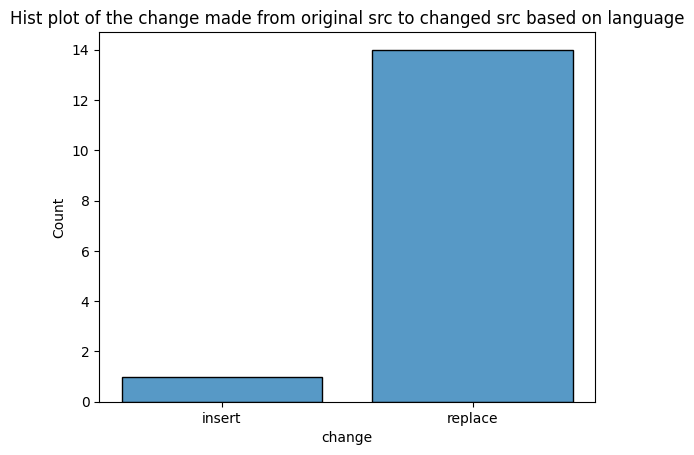

,change
change,
insert,1
replace,14


In [4]:
# the AoC dataset contains mostly replacement and some insertions, usually a deletion would 
# happen because the user forgot to delete a debugging print message, which is not hard
# repair manually. insertions would happen when the user forgets to add a check for
# edge cases, which could be interesting to identify using machine learning. most of the
# bugs however will be of type replace, meaning that the user changed something in the buggy
# code to make it work. this is the reasoning why our dataset is mainly composed of replace changes.

sns.histplot(x=df["change"], multiple="dodge", 
             stat="count", shrink=0.8, common_norm=False)

plt.title("Hist plot of the change made from original src to changed src based on language")
plt.show()

df.groupby(["change"]).agg({"change": "count"})

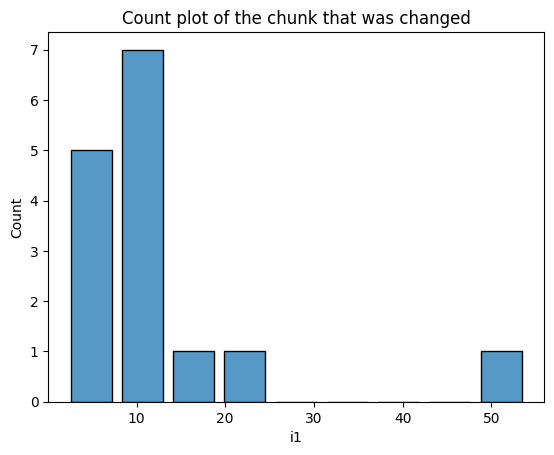

In [5]:
# the bugs can happen anywhere in the file, but we have found that many examples
# where the changed line was in the first four or five to be really simple problems.
# it was also the case that many such bugs were being caused by wrong parsing of 
# the input. thus, we tried to focus only on bugs that are not related to parsing the input
# in the AoC eval dataset. with mostly algorithm bugs we found that the average line change 
# would be above ten lines of code.

x = df["i1"].map(lambda line: line if line < 100 else 100)
sns.histplot(x=x, stat="count", shrink=0.8, common_norm=False)

plt.title("Count plot of the chunk that was changed")
plt.show()

The maximum size of a chunk is 10


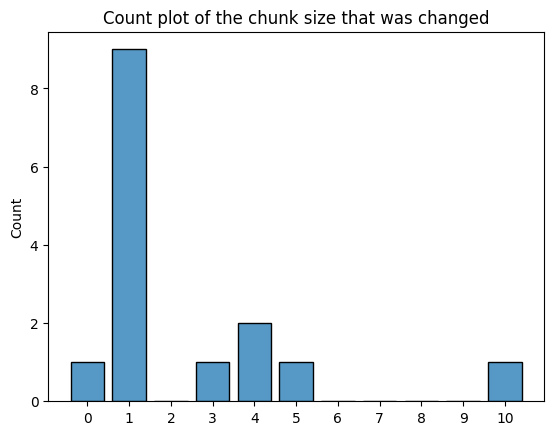

In [6]:
# we have tought that the size of the chunk (block of code that was changed) 
# would play the biggest factor in making the task of repair easier. however,
# we have noticed that large language models, like ChatGTP and OpenAssitant,
# have struggled to find repairs for even one line changes. in fact the most 
# important factor was the using of the problem statement in the input prompt.
# this made the difference between provifing the user with a meaningful hint
# or solution for the bug at hand.

x = (df["i2"] - df["i1"])
x_cap = x.map(lambda line: line if line < 10 else 10).astype("category")

sns.histplot(x=x_cap, multiple="dodge", 
             stat="count", shrink=0.8, common_norm=False)
plt.xticks(list(range(11)))

print(f"The maximum size of a chunk is {x.max()}")

plt.title("Count plot of the chunk size that was changed")
plt.show()